# Example 5. Stochastic Gradian Decent
---
Here we are going to introduce the **Stochastic Gradian Decent** with **Adaline** method. This can be used for ***online*** learning. 
1. **Adaline** : As the defination in [Example 4](example_04_AdalineGD.ipynb), the algorithm bases on Adaptive Linear algorithm, i.e. the *cost function* is **Sum of Squarde Error** with linear hyperplane.
2. **Stochastic** : It is also called **online**, which updates the weight data point by data point instead of *batch* leaning as Adaline. Thus, the form for updating weight $dw$ in Adaline is changed from 
$$dw_j = \left[\,\eta\sum_i^N[y_i-\phi(z_i(w))]x_i\,\right]_j$$ 
to 
$$dw_{j,i} = \left[\,\eta(y_i-\phi(z_i(w))x_i\,\right]_j\ ,$$ where $j$ is index of iteration, i.e. the $dw$ is from summing over all data ponit to individual. The new *Pyhton* class for this online learning algorithm is [AdalineGD_online.py](AdalineGD_online.py).

------
### Import basic needed modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from plot_decision_regions import * 

---
### Load, setup data/variables and standardization
1\. Input Iris.data (.CSV) with *pandas* to be a dataframe (df)

In [2]:
df = pd.read_csv('../data/iris.data', header=None)[:100] # Keep data from 0-99
df.columns = ['sepal_length', 'x_1', 'petal_length', 'x_3', 'type']
df.tail()

,sepal_length,x_1,petal_length,x_3,type
95,5.7,3.0,4.2,1.2,Iris-versicolor
96,5.7,2.9,4.2,1.3,Iris-versicolor
97,6.2,2.9,4.3,1.3,Iris-versicolor
98,5.1,2.5,3.0,1.1,Iris-versicolor
99,5.7,2.8,4.1,1.3,Iris-versicolor


In [3]:
# Filling y and X
X = df.iloc[:, [0,2]].values
y = df.iloc[:, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

2\. Standardilize variables

In [4]:
X_std = np.copy(X)
X_std[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std() # sepal_length
X_std[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std() # petal_length

3\. Overview the data distribution

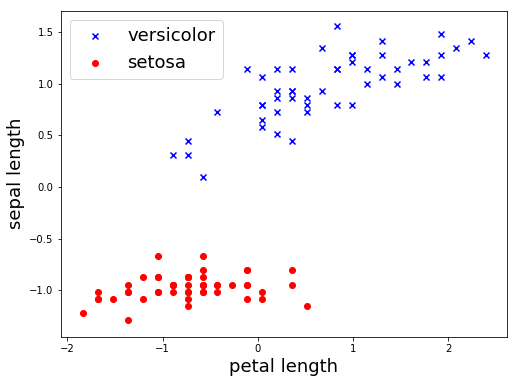

In [5]:
# Ploting : significance variables
plt.figure(figsize=(8, 6))
plt.scatter(X_std[ y == 1, 0], X_std[ y == 1, 1], color='blue', marker='x', label='versicolor')
plt.scatter(X_std[ y ==-1, 0], X_std[ y ==-1, 1], color='red',  marker='o', label='setosa')
plt.xlabel('petal length', fontsize=18)
plt.ylabel('sepal length', fontsize=18)
plt.legend(loc='upper left', fontsize=18)
plt.show()

---
### Preview the performace of Adaline online gradian decent
1\. Import the hand-made class, see [AdalineGD_online.py](AdalineGD_online.py)

In [6]:
from AdalineGD_online import AdalineGD_online

2\. Run the algorithm and show the decision boundary with 15 iterations and random state = 1. (Follow the book)

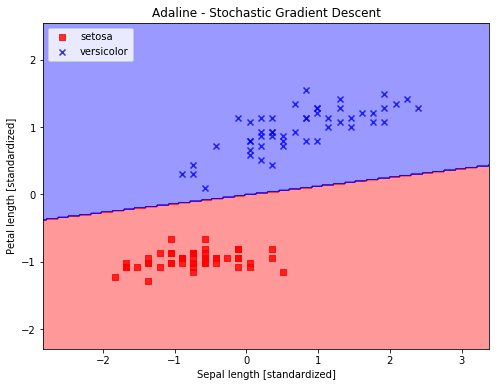

Weights [w0, w1,....] : [ 0.01081067 -0.13961527  1.07501121]


In [7]:
ada = AdalineGD_online(n_iter=15, eta=0.01, random_state=1)
ada.fit(X_std, y)

plt.figure(figsize=(8, 6))
plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Stochastic Gradient Descent')
plt.xlabel('Sepal length [standardized]')
plt.ylabel('Petal length [standardized]')
plt.legend(loc='upper left')
plt.show()
print 'Weights [w0, w1,....] : '+str(ada.w_)

3\. Show the perfomance behavior of each iteration with the average cost. The average cost is 
$$\frac{1}{N}J(w)=\frac{1}{2N}\sum_i^N{(y_i-\phi(z_i(w))^2}\ ,$$ which is the similar to the cost fuction in Adaline $J(w)$, but the $w$ is different and updating for each data point.

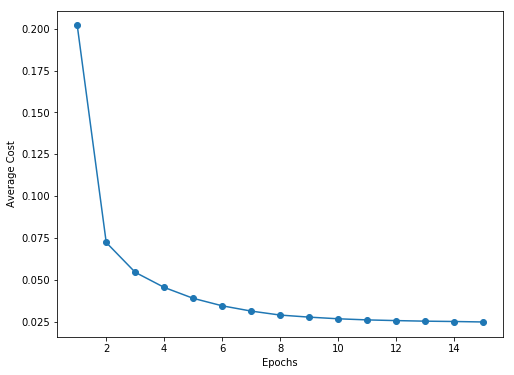

In [8]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average Cost')
plt.show()

---
###  Generate and compare many hypotheses by changing random seed. 
1\. Generate 50 hypotheses

In [9]:
n_iter=20
n_hyps = 40
adas = []
print 'Generating....'
for h in range(n_hyps):
    ada = AdalineGD_online(n_iter=n_iter, eta=0.01, random_state=h)
    ada.fit(X_std, y)
    adas.append(ada)
print 'Done!'

Generating....
Done!


2\. Show the behavior of each different random state (hypothesis). You can find the results of the hypothesis are quite stable.

Generating....


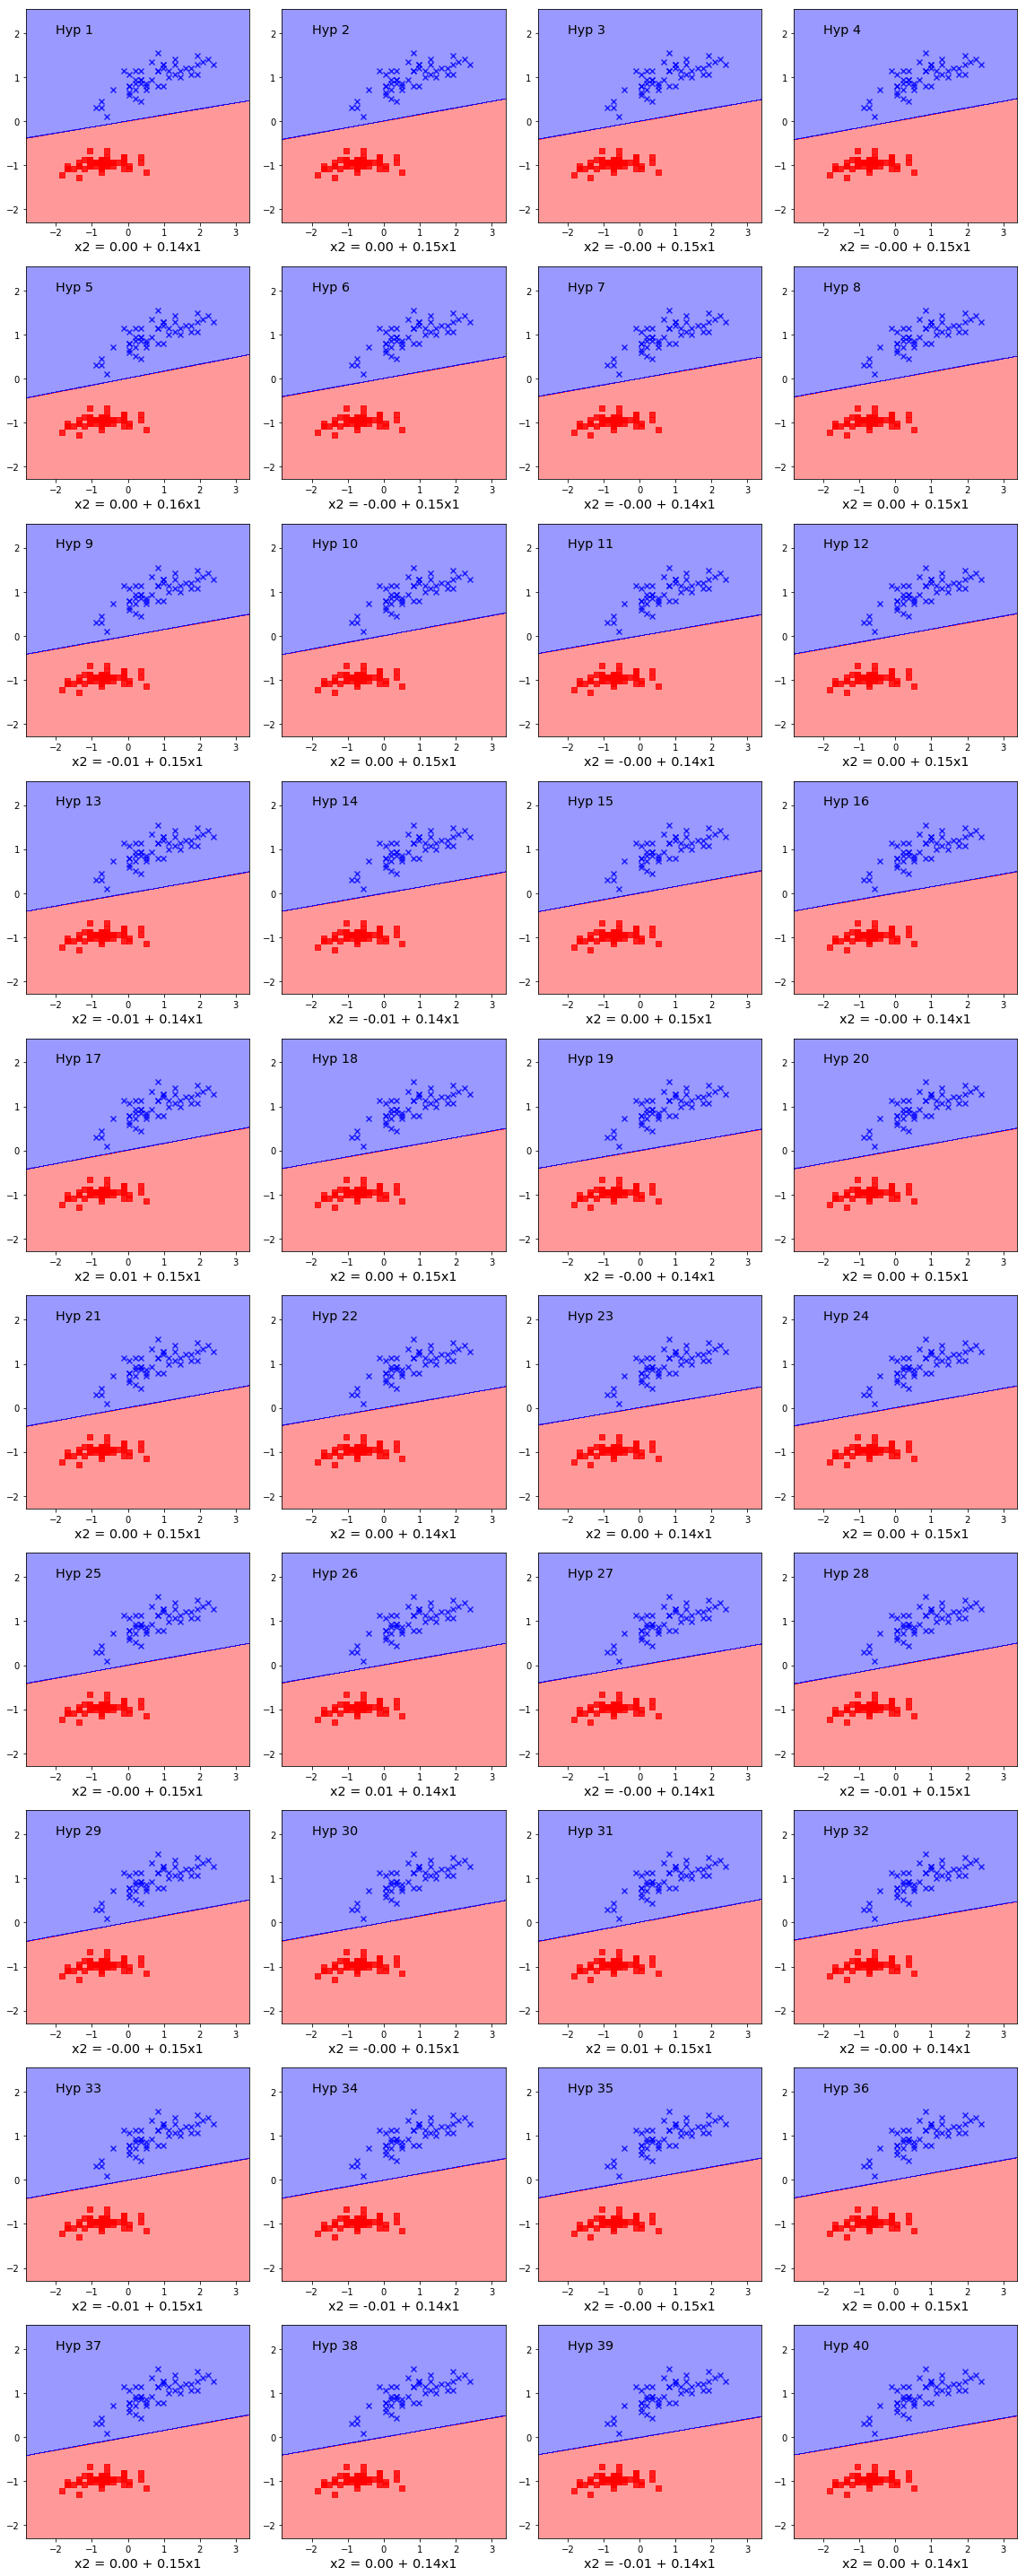

Done


In [10]:
cplot=4
fig = plt.figure(figsize=(16, n_hyps))
print 'Generating....'
for h in range(n_hyps):
    c0 = -1*adas[h].w_[0]/adas[h].w_[2]
    c1 = -1*adas[h].w_[1]/adas[h].w_[2]
    fig.add_subplot(int(n_hyps/cplot), cplot, h+1)
    plot_decision_regions(X_std, y, classifier=adas[h], resolution=0.01)
    plt.xlabel('x2 = %.2f + %.2fx1'%( c0, c1 ), fontsize='x-large' )
    plt.text(-2, 2, 'Hyp '+str(h+1), fontsize='x-large')
plt.tight_layout()
plt.show()
print 'Done'

---
###  Variate the $\eta$ and check the learning curve. 
1\. Variate $\eta$ from $10^{-4}$ with 2 step.

In [11]:
adas = []
n_test = 0
etamin = 0.0001
etastp = 2
etamax = 2
eta = etamin
print 'Generating....'
while eta <= etamax and eta is not 1:
    eta = 1 if eta > 1 else eta
    ada = AdalineGD_online(n_iter=20, eta=eta, random_state=1)
    ada.fit(X_std, y)
    adas.append(ada)
    n_test += 1
    if eta is 1: 
        break
    else: 
        eta *= etastp
etamax = eta
print 'Done %d tests'%(n_test)

Generating....
Done 15 tests


AdalineGD_online.py:63: RuntimeWarning: overflow encountered in double_scalars
  cost = 0.5 * error**2


Generating....


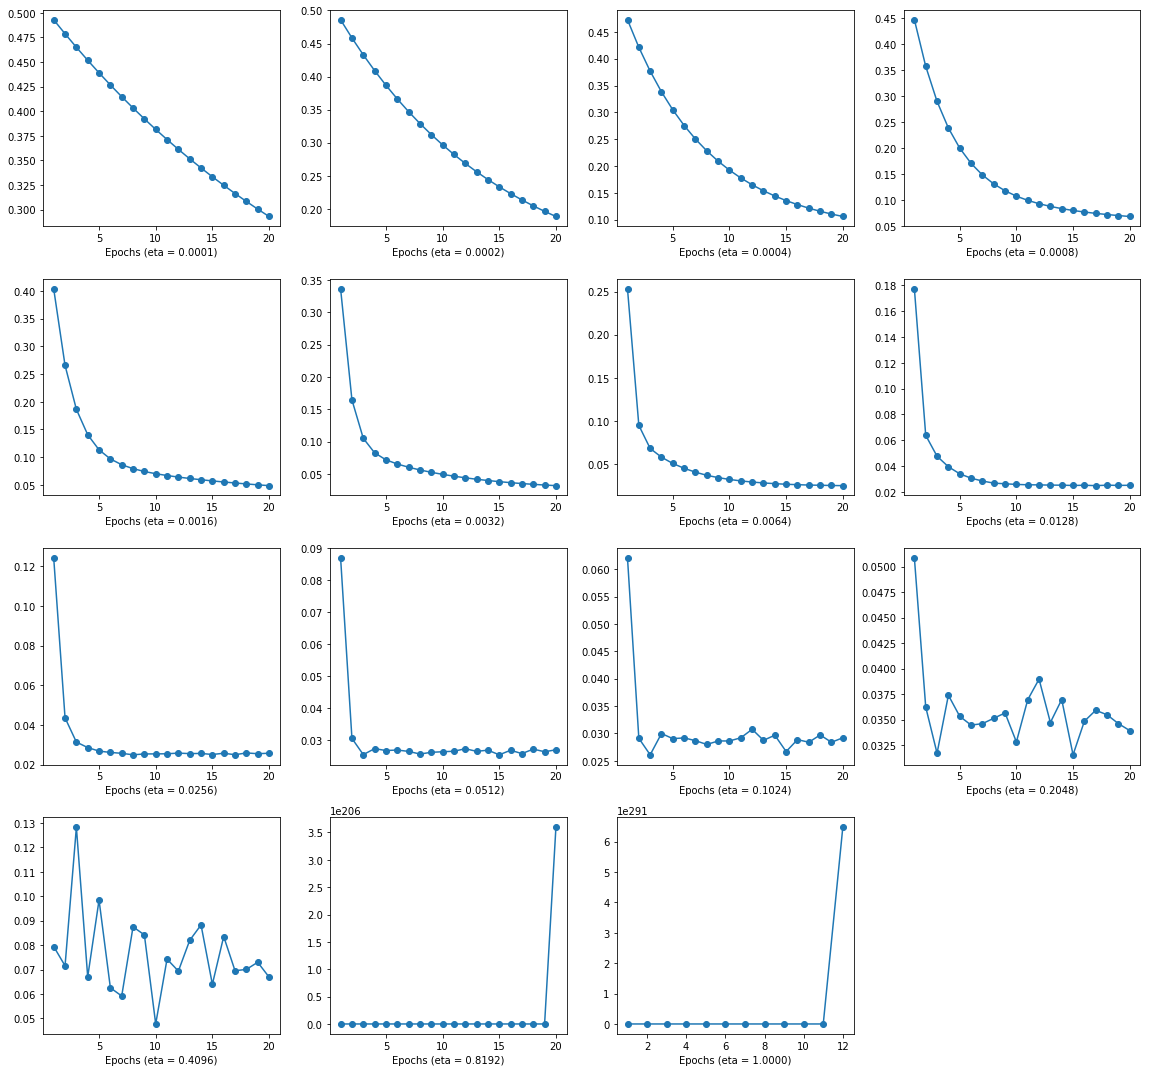

Done!


In [12]:
cplot=4
r = int(n_test/cplot)
fig = plt.figure(figsize=(16, n_test))
print 'Generating....'
for i in range(n_test):
    fig.add_subplot(r if n_test%cplot is 0 else r+1, cplot, i+1)
    plt.plot(range(1, len(adas[i].cost_) + 1), adas[i].cost_, marker='o')
    plt.xlabel('Epochs (eta = %.4f)'%( etamin*(etastp**i) if i is not n_test-1 else etamax) )
plt.tight_layout()
plt.show()
print 'Done!'

### Conclusion